# Exploración de datos

In [ ]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import re

In [ ]:
datos = []

# Obtener lista de los archivos
files = glob.glob("Datos*.xlsx")

# Iterar por cada archivo
for filename in files:
    # Extraer el Año del nombre del archivo
    match = re.search(r"Datos(\d{4})\.xlsx", filename)
    if not match:
        continue
    year = int(match.group(1))

    try:
        excel_data = pd.read_excel(filename, sheet_name=None)
    except Exception as e:
        print(f"Error al leer el archivo Excel {filename}: {e}")
        continue

    # Iterar sobre cada hoja de los archivos
    for sheet_name, df in excel_data.items():
        # Asegurarse de que no sea una hoja de metadata o vacía
        if df.empty:
            continue

        # Agregar columnas de identificación
        df['Year'] = year
        df['Station'] = sheet_name
        datos.append(df)


# Merge de todos los DataFrames en uno solo
final_df = pd.concat(datos, ignore_index=True)


In [ ]:
final_df['Station'] = final_df['Station'].str.extract(r'^([^_]+)')

def obtener_estacion(fecha):
    mes = fecha.month
    dia = fecha.day

    if (mes == 12 and dia >= 21) or (1 <= mes <= 2) or (mes == 3 and dia < 20):
        return "Invierno"
    elif (mes == 3 and dia >= 20) or (4 <= mes <= 5) or (mes == 6 and dia < 21):
        return "Primavera"
    elif (mes == 6 and dia >= 21) or (7 <= mes <= 8) or (mes == 9 and dia < 22):
        return "Verano"
    else:
        return "Otoño"

final_df["Season"] = final_df["Fecha y hora"].apply(obtener_estacion)

In [ ]:
final_df

,Fecha y hora,CO (ppm),NO (ppb),NO2 (ppb),NOX (ppb),O3 (ppb),PM10 (ug/m3),PM2.5 (ug/m3),PRS (mmHg),RAINF (mm/h),RH (%),SO2 (ppb),SR (kW/m2),TOUT (ºC),WSR (km/h),WDR (azimutal),Year,Station,Season
0,2021-01-01 00:00:00,1.41,34.24,19.12,52.16,27.6,82.0,28.0,718.76,0.0,69.0,NaN,0.000,8.18,5.8,113.0,2021,Norte2,Invierno
1,2021-01-01 06:00:00,1.39,34.50,15.02,48.32,6.0,45.0,15.0,712.50,0.0,81.0,NaN,0.000,4.24,1.4,81.0,2021,Norte2,Invierno
2,2021-01-01 12:00:00,1.23,20.88,12.68,32.78,21.4,42.0,17.8,715.30,0.0,59.0,NaN,0.405,10.06,7.8,76.0,2021,Norte2,Invierno
3,2021-01-01 18:00:00,1.19,11.28,14.32,24.78,17.4,44.0,2.0,714.60,0.0,58.0,NaN,0.013,10.89,4.1,130.0,2021,Norte2,Invierno
4,2021-01-02 00:00:00,1.41,60.88,12.72,73.56,3.8,68.0,23.0,717.90,0.0,58.0,NaN,0.000,10.91,3.7,235.0,2021,Norte2,Invierno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44127,2023-12-30 18:00:00,1.45,2.90,9.20,12.10,59.0,36.0,9.0,702.60,0.0,29.0,3.5,0.029,18.48,8.2,122.0,2023,Centro,Invierno
44128,2023-12-31 00:00:00,2.07,17.80,41.70,59.50,10.0,68.0,37.0,703.20,0.0,46.0,3.7,0.001,12.60,3.0,235.0,2023,Centro,Invierno
44129,2023-12-31 06:00:00,1.51,3.40,15.80,19.20,26.0,70.0,25.0,701.20,0.0,49.0,3.7,0.001,10.54,1.5,296.0,2023,Centro,Invierno
44130,2023-12-31 12:00:00,1.59,7.50,15.50,23.10,44.0,38.0,11.0,714.00,0.0,26.0,3.7,0.567,20.70,3.6,79.0,2023,Centro,Invierno


In [ ]:
# Dimensión del dataset

final_df.shape

(44132, 19)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44132 entries, 0 to 44131
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha y hora    44132 non-null  datetime64[ns]
 1   CO (ppm)        43626 non-null  float64       
 2   NO (ppb)        43649 non-null  float64       
 3   NO2 (ppb)       43650 non-null  float64       
 4   NOX (ppb)       43701 non-null  float64       
 5   O3 (ppb)        43552 non-null  float64       
 6   PM10 (ug/m3)    44132 non-null  float64       
 7   PM2.5 (ug/m3)   40947 non-null  float64       
 8   PRS (mmHg)      44132 non-null  float64       
 9   RAINF (mm/h)    43756 non-null  float64       
 10  RH (%)          42592 non-null  float64       
 11  SO2 (ppb)       43111 non-null  float64       
 12  SR (kW/m2)      42759 non-null  float64       
 13  TOUT (ºC)       43172 non-null  float64       
 14  WSR (km/h)      43948 non-null  float64       
 15  WD

In [ ]:
# Tipos de variables

final_df.dtypes

,0
Fecha y hora,datetime64[ns]
CO (ppm),float64
NO (ppb),float64
NO2 (ppb),float64
NOX (ppb),float64
O3 (ppb),float64
PM10 (ug/m3),float64
PM2.5 (ug/m3),float64
PRS (mmHg),float64
RAINF (mm/h),float64


In [ ]:
# Medidas estadísticas

final_df.describe()

,Fecha y hora,CO (ppm),NO (ppb),NO2 (ppb),NOX (ppb),O3 (ppb),PM10 (ug/m3),PM2.5 (ug/m3),PRS (mmHg),RAINF (mm/h),RH (%),SO2 (ppb),SR (kW/m2),TOUT (ºC),WSR (km/h),WDR (azimutal),Year
count,44132,43626.000000,43649.000000,4.365000e+04,43701.000000,43552.000000,44132.000000,40947.000000,44132.000000,43756.000000,4.259200e+04,43111.000000,42759.000000,43172.000000,43948.000000,41129.000000,44132.000000
mean,2025-07-29 07:48:26.136136960,2.077607,12.354339,4.256010e+02,27.173216,29.729717,58.931704,71.171526,664.100267,3.647047,5.150482e+01,4.670925,5.165788,22.251655,20.235725,127.863398,2022.687959
min,2021-01-01 00:00:00,0.000000,0.200000,0.000000e+00,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000,7.105427e-15,0.000000,-9999.000000,-6.160000,0.100000,1.000000,2021.000000
25%,2022-05-05 12:00:00,0.930000,3.100000,7.800000e+00,11.400000,13.000000,34.000000,12.810000,701.100000,0.000000,3.500000e+01,2.800000,0.000000,17.200000,4.800000,70.000000,2022.000000
50%,2023-04-30 12:00:00,1.475000,5.300000,1.330000e+01,18.720000,26.000000,51.000000,20.378000,709.400000,0.000000,5.400000e+01,4.000000,0.026000,23.390000,8.200000,104.000000,2022.000000
75%,2024-05-03 06:00:00,2.090000,12.400000,2.180000e+01,32.400000,41.000000,73.000000,32.570000,714.300000,0.000000,7.100000e+01,5.600000,0.290000,28.010000,12.400000,149.000000,2024.000000
max,2137-05-08 18:00:00,145.700000,945.100000,9.469999e+06,971.800000,526.000000,963.000000,731.300000,729.400000,360.000000,1.010000e+02,88.400000,7794.000000,71.600000,360.000000,360.000000,2025.000000
std,NaN,3.681945,20.237987,6.020894e+04,27.353735,21.856154,40.766912,176.626510,173.783929,14.885311,2.417319e+01,3.650450,215.498594,8.075623,51.718704,88.579881,1.266811


In [ ]:
# dataset sin categoricos

df = final_df.drop(columns=['Station', 'Year', 'Fecha y hora', 'Season','PRS (mmHg)','TOUT (ºC)'])
df

,CO (ppm),NO (ppb),NO2 (ppb),NOX (ppb),O3 (ppb),PM10 (ug/m3),PM2.5 (ug/m3),RAINF (mm/h),RH (%),SO2 (ppb),SR (kW/m2),WSR (km/h),WDR (azimutal)
0,1.41,34.24,19.12,52.16,27.6,82.0,28.0,0.0,69.0,NaN,0.000,5.8,113.0
1,1.39,34.50,15.02,48.32,6.0,45.0,15.0,0.0,81.0,NaN,0.000,1.4,81.0
2,1.23,20.88,12.68,32.78,21.4,42.0,17.8,0.0,59.0,NaN,0.405,7.8,76.0
3,1.19,11.28,14.32,24.78,17.4,44.0,2.0,0.0,58.0,NaN,0.013,4.1,130.0
4,1.41,60.88,12.72,73.56,3.8,68.0,23.0,0.0,58.0,NaN,0.000,3.7,235.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44127,1.45,2.90,9.20,12.10,59.0,36.0,9.0,0.0,29.0,3.5,0.029,8.2,122.0
44128,2.07,17.80,41.70,59.50,10.0,68.0,37.0,0.0,46.0,3.7,0.001,3.0,235.0
44129,1.51,3.40,15.80,19.20,26.0,70.0,25.0,0.0,49.0,3.7,0.001,1.5,296.0
44130,1.59,7.50,15.50,23.10,44.0,38.0,11.0,0.0,26.0,3.7,0.567,3.6,79.0


In [ ]:
#complementar estadística
print("Mediana: \n", df.median())
print("Moda: \n", df.mode())
print("Varianza: \n", df.var())

Mediana: 
 CO (ppm)            1.475
NO (ppb)            5.300
NO2 (ppb)          13.300
NOX (ppb)          18.720
O3 (ppb)           26.000
PM10 (ug/m3)       51.000
PM2.5 (ug/m3)      20.378
RAINF (mm/h)        0.000
RH (%)             54.000
SO2 (ppb)           4.000
SR (kW/m2)          0.026
WSR (km/h)          8.200
WDR (azimutal)    104.000
dtype: float64
Moda: 
    CO (ppm)  NO (ppb)  NO2 (ppb)  NOX (ppb)  O3 (ppb)  PM10 (ug/m3)  \
0      1.13       3.0        6.1       11.0       5.0          43.0   

   PM2.5 (ug/m3)  RAINF (mm/h)  RH (%)  SO2 (ppb)  SR (kW/m2)  WSR (km/h)  \
0           12.0           0.0    77.0        3.3         0.0         1.4   

   WDR (azimutal)  
0           101.0  
Varianza: 
 CO (ppm)          1.355672e+01
NO (ppb)          4.095761e+02
NO2 (ppb)         3.625116e+09
NOX (ppb)         7.482268e+02
O3 (ppb)          4.776915e+02
PM10 (ug/m3)      1.661941e+03
PM2.5 (ug/m3)     3.119692e+04
RAINF (mm/h)      2.215725e+02
RH (%)            5.843429e+02

In [ ]:
#Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Definir outliers usando la Regla de Tukey
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df < limite_inferior) | (df > limite_superior)]

# Mostrar resultados
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Outliers:\n{outliers}")

Q1: CO (ppm)           0.93
NO (ppb)           3.10
NO2 (ppb)          7.80
NOX (ppb)         11.40
O3 (ppb)          13.00
PM10 (ug/m3)      34.00
PM2.5 (ug/m3)     12.81
RAINF (mm/h)       0.00
RH (%)            35.00
SO2 (ppb)          2.80
SR (kW/m2)         0.00
WSR (km/h)         4.80
WDR (azimutal)    70.00
Name: 0.25, dtype: float64, Q3: CO (ppm)            2.09
NO (ppb)           12.40
NO2 (ppb)          21.80
NOX (ppb)          32.40
O3 (ppb)           41.00
PM10 (ug/m3)       73.00
PM2.5 (ug/m3)      32.57
RAINF (mm/h)        0.00
RH (%)             71.00
SO2 (ppb)           5.60
SR (kW/m2)          0.29
WSR (km/h)         12.40
WDR (azimutal)    149.00
Name: 0.75, dtype: float64, IQR: CO (ppm)           1.16
NO (ppb)           9.30
NO2 (ppb)         14.00
NOX (ppb)         21.00
O3 (ppb)          28.00
PM10 (ug/m3)      39.00
PM2.5 (ug/m3)     19.76
RAINF (mm/h)       0.00
RH (%)            36.00
SO2 (ppb)          2.80
SR (kW/m2)         0.29
WSR (km/h)         7.60
WDR (a

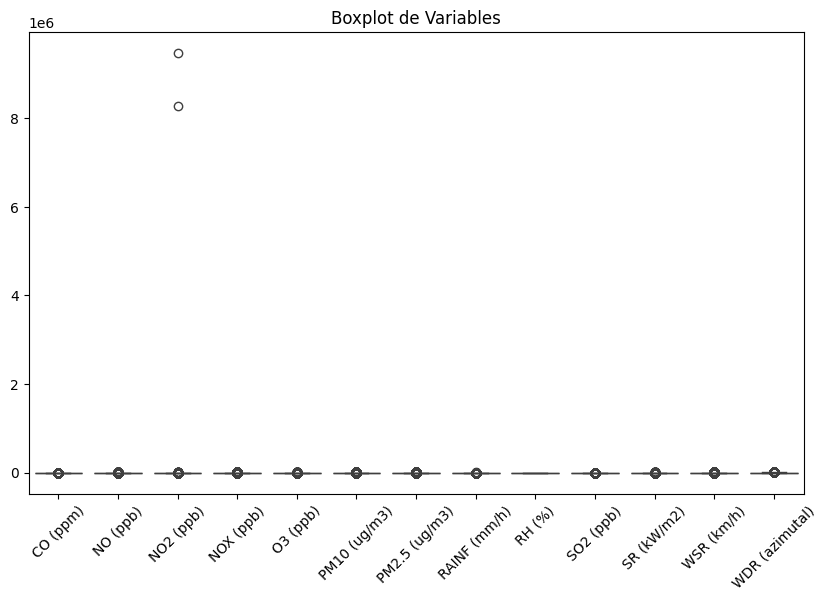

In [ ]:
#Boxplots

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(data=df)

# Personalizar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas si son muchas columnas
plt.title("Boxplot de Variables")
plt.show()

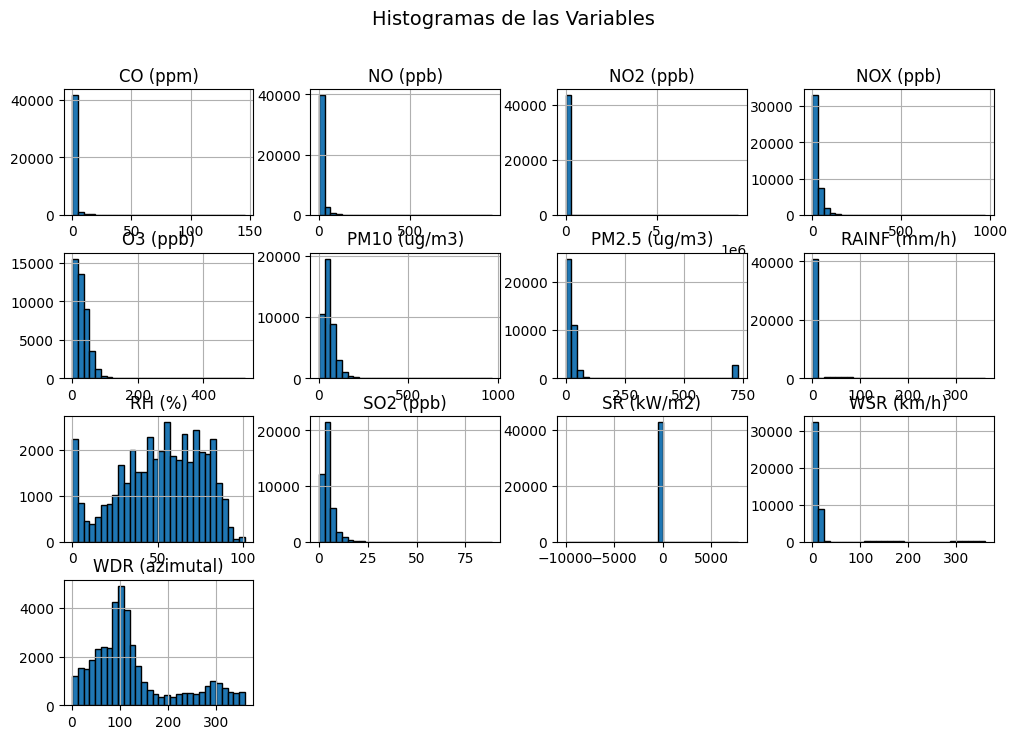

In [ ]:
#Histograma por variable
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histogramas de las Variables", fontsize=14)
plt.show()

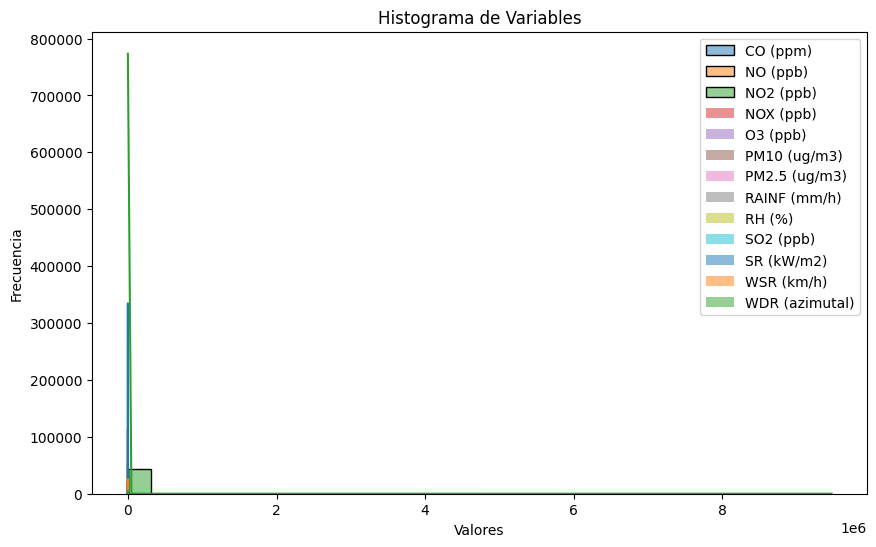

In [ ]:
plt.figure(figsize=(10, 6))
for column in df.columns:
    sns.histplot(df[column], bins=30, kde=True, label=column, alpha=0.5)  # Alpha ajusta la transparencia
plt.legend()
plt.title("Histograma de Variables")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()

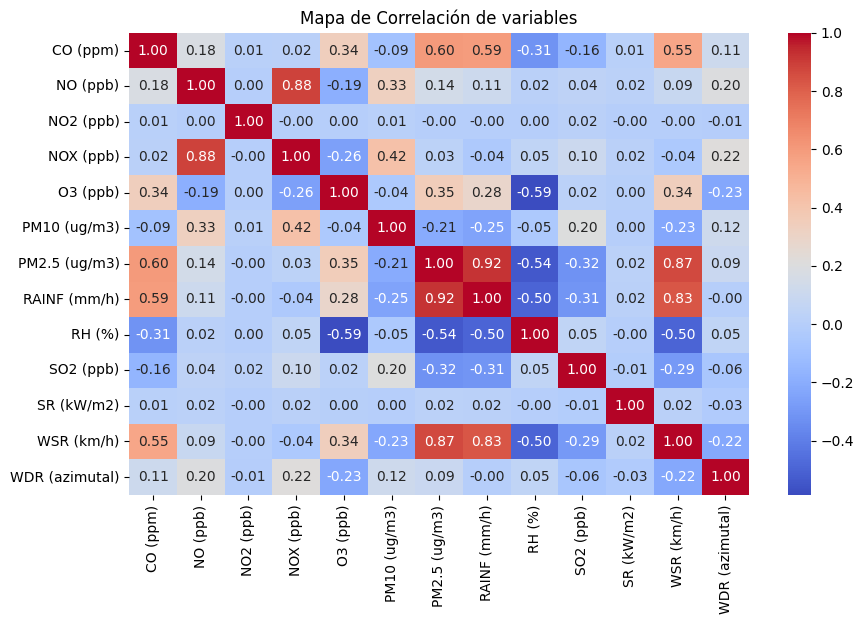

In [ ]:
# Heatmap de correlaciones
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlación de variables")
plt.show()

# Calidad de los datos

In [ ]:
#Valores vacíos
df.isnull().sum()

,0
CO (ppm),506
NO (ppb),483
NO2 (ppb),482
NOX (ppb),431
O3 (ppb),580
PM10 (ug/m3),0
PM2.5 (ug/m3),3185
RAINF (mm/h),376
RH (%),1540
SO2 (ppb),1021


In [ ]:
print(f"Filas duplicadas: {df.duplicated().sum()}")

Filas duplicadas: 1661
